In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [292]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
from imblearn.under_sampling import NearMiss

In [238]:
df_06 = pd.read_csv('datasets/htx_2006_weather.csv', na_values='Blank').dropna()
df_10 = pd.read_csv('datasets/htx_2010_weather.csv', na_values='Blank').dropna()
df_11 = pd.read_csv('datasets/htx_2011_weather.csv', na_values='Blank').dropna()
df_12 = pd.read_csv('datasets/htx_2012_weather.csv', na_values='Blank').dropna() 
df_13 = pd.read_csv('datasets/htx_2013_weather.csv', na_values='Blank').dropna()
df_14 = pd.read_csv('datasets/htx_2014_weather.csv', na_values='Blank').dropna()
df_15 = pd.read_csv('datasets/htx_2015_weather.csv', na_values='Blank').dropna()
df_18 = pd.read_csv('datasets/htx_2018_weather.csv', na_values='Blank').dropna()
df_19 = pd.read_csv('datasets/htx_2019_weather.csv', na_values='Blank').dropna()
df_21 = pd.read_csv('datasets/htx_2021_weather.csv', na_values='Blank').dropna()

df = pd.concat([df_06, df_10, df_11, df_12, df_13, df_14, df_15, df_18, df_19, df_21])
# df = df_06

In [239]:
# remap Yes/No to 1/0 for rain_tomorrow column
df.rain_tomorrow = df.rain_tomorrow.map(dict(Yes=1, No=0))

In [240]:
df.rain_tomorrow.value_counts()

0    2955
1     662
Name: rain_tomorrow, dtype: int64

In [241]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
nm = NearMiss()
filtered_df = df[['min_temp', 
                'max_temp', 
                'wind_speed3pm', 
                'humidity3pm', 
                'pressure3pm', 
                'temp3pm',
                'rainfall']]
filtered_df_resampled, df_rain_tomorrow_resampled = nm.fit_resample(filtered_df, df[["rain_tomorrow"]])
df_rain_tomorrow_resampled.value_counts()

rain_tomorrow
0                662
1                662
dtype: int64

<AxesSubplot:title={'center':'Probability of rain tomorrow vs min temp'}, xlabel='min_temp', ylabel='rain_tomorrow'>

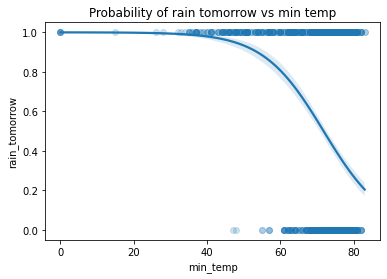

In [242]:
plt.title("Probability of rain tomorrow vs min temp")
sns.regplot(x=filtered_df_resampled.min_temp, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs max temp'}, xlabel='max_temp', ylabel='rain_tomorrow'>

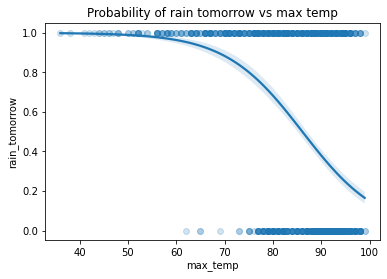

In [243]:
plt.title("Probability of rain tomorrow vs max temp")
sns.regplot(x=filtered_df_resampled.max_temp, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs wind speed at 3pm'}, xlabel='wind_speed3pm', ylabel='rain_tomorrow'>

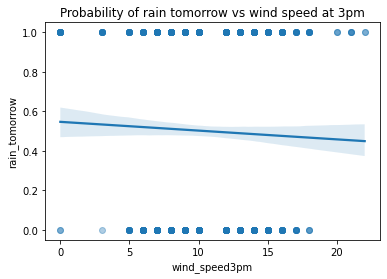

In [244]:
plt.title("Probability of rain tomorrow vs wind speed at 3pm")
sns.regplot(x=filtered_df_resampled.wind_speed3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs humidity at 3pm'}, xlabel='humidity3pm', ylabel='rain_tomorrow'>

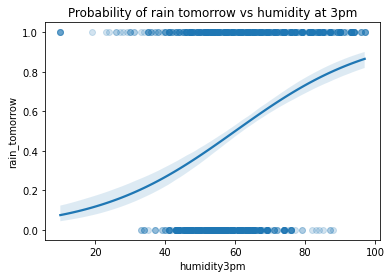

In [245]:
plt.title("Probability of rain tomorrow vs humidity at 3pm")
sns.regplot(x=filtered_df_resampled.humidity3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs pressure at 3pm'}, xlabel='pressure3pm', ylabel='rain_tomorrow'>

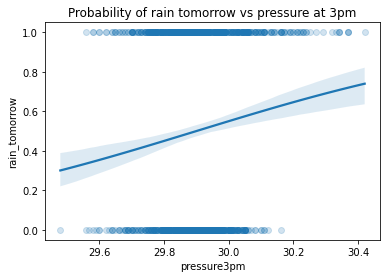

In [246]:
plt.title("Probability of rain tomorrow vs pressure at 3pm")
sns.regplot(x=filtered_df_resampled.pressure3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs temp at 3pm'}, xlabel='temp3pm', ylabel='rain_tomorrow'>

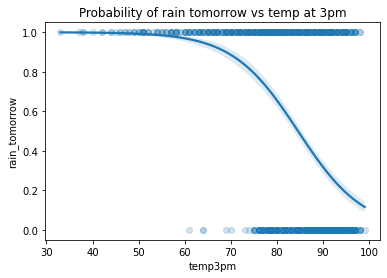

In [247]:
plt.title("Probability of rain tomorrow vs temp at 3pm")
sns.regplot(x=filtered_df_resampled.temp3pm, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='rainfall', ylabel='rain_tomorrow'>

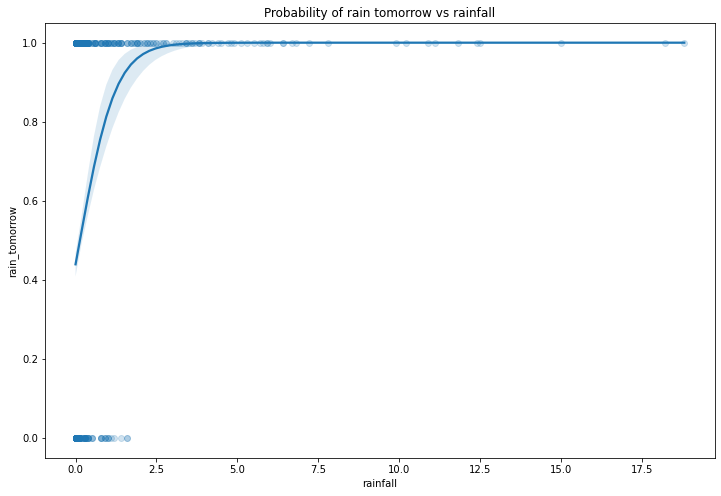

In [248]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=filtered_df_resampled.rainfall, y=df_rain_tomorrow_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})

In [249]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [250]:
x_train = train[['rainfall']]
y_train = train[['rain_tomorrow']]

In [251]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_resampled, y_train_resampled = nm.fit_resample(x_train, y_train)
y_train_resampled.value_counts()

rain_tomorrow
0                402
1                402
dtype: int64

In [252]:
x_test = test[['rainfall']]

y_test = test[['rain_tomorrow']]

In [253]:
model = LogisticRegression()  
model.fit(x_train_resampled, y_train_resampled)

/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [254]:
model.predict(x_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [255]:
print('R squared: {:.2f}'.format(model.score(x_test,y_test)*100))

R squared: 78.31


In [300]:
scaler = MinMaxScaler().fit(df[['rainfall', 'rain_tomorrow']])

In [301]:
train_scaled, validate_scaled, test_scaled = \
              np.split(df[['rainfall', 'rain_tomorrow']].sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])
              
train_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(train_scaled[['rainfall', 'rain_tomorrow']])
validate_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(validate_scaled[['rainfall', 'rain_tomorrow']])
test_scaled[['rainfall', 'rain_tomorrow']] = scaler.transform(test_scaled[['rainfall', 'rain_tomorrow']])

In [302]:
x_train_scaled = train_scaled[['rainfall']]
y_train_scaled = train_scaled[['rain_tomorrow']]

In [303]:
# rebalance the data to balance the rain_tomorrow 1s and 0s
x_train_scaled_resampled, y_train_scaled_resampled = nm.fit_resample(x_train_scaled, y_train_scaled)

In [304]:
x_test_scaled = test_scaled[['rainfall']]

y_test_scaled = test_scaled[['rain_tomorrow']]

In [305]:
model_scaled = LogisticRegression()  
model_scaled.fit(x_train_scaled_resampled, y_train_scaled_resampled)
print('R squared: {:.2f}'.format(model.score(x_test_scaled,y_test_scaled)*100))

R squared: 81.91


/Users/ancheypeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:title={'center':'Probability of rain tomorrow vs rainfall'}, xlabel='rainfall', ylabel='rain_tomorrow'>

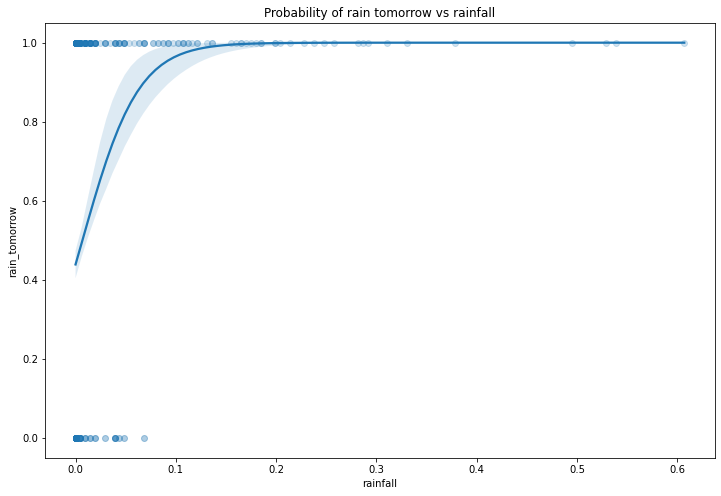

In [306]:
plt.figure(figsize=(12,8))
plt.title("Probability of rain tomorrow vs rainfall")
sns.regplot(x=x_train_scaled_resampled.rainfall, y=y_train_scaled_resampled.rain_tomorrow, logistic=True, scatter_kws={'alpha':0.2})